In [1]:
import pandas as pd
import numpy as np

1. Load the data files and display 5 random records from each file.

In [2]:
invoice = pd.read_json("invoices.json").drop_duplicates(subset='InvoiceNo')
item = pd.read_json("items.json")
purchase = pd.read_json("purchases.json")

In [3]:
invoice.sample(5)

,InvoiceNo,InvoiceDate,CustomerID,Country
21709,574143,11/3/11 11:27,18041.0,United Kingdom
11850,556943,6/15/11 16:54,NaN,United Kingdom
25853,581429,12/8/11 15:41,16322.0,United Kingdom
5426,546107,3/9/11 12:33,17238.0,United Kingdom
2651,541227,1/14/11 15:29,16839.0,United Kingdom


In [4]:
item.sample(5)

,StockCode,Description,UnitPrice
1691,44234,ASSORTED CIRCULAR MOBILE,1.66
1035,21679,SKULLS STICKERS,1.66
1655,22518,CHILDS GARDEN BRUSH BLUE,4.21
2168,22700,BLACK AND WHITE DOG BOWL,2.95
789,21911,GARDEN METAL SIGN,3.36


In [5]:
purchase.sample(5)

,InvoiceNo,StockCodeSC,Quantity
369049,569010,SC22978,48
424990,573300,SC23282,2
107037,545400,SC22281,4
24632,538349,SC22578,4
283485,561750,SC22749,4


2. What fraction of invoices were shipped?

In [6]:
cancelled_num = invoice[pd.Series(invoice['InvoiceNo']).str.startswith('C')]['InvoiceNo'].count()
(len(invoice['InvoiceNo'])-cancelled_num)/len(invoice['InvoiceNo'])

0.8518918918918919

About 0.85 invoices were shipped.

3. How many unique customers are there (regardless of shipped or not)?

In [7]:
len(pd.unique(invoice['CustomerID']))

4373

Total 4373 unique customers.

4. What is the total number of unique items whose unit price is not more than 2?

In [8]:
item[item['UnitPrice']<=2]['StockCode'].count()

1808

1808 items.

5. How many missing/null values does each column in the data have?

In [9]:
for col in invoice.columns:
    print(col, pd.Series(invoice[col]).isna().sum())
    
for col in item.columns:
    print(col, pd.Series(item[col]).isna().sum())
    
for col in purchase.columns:
    print(col, pd.Series(purchase[col]).isna().sum())

InvoiceNo 0
InvoiceDate 0
CustomerID 3710
Country 0
StockCode 0
Description 176
UnitPrice 0
InvoiceNo 0
StockCodeSC 0
Quantity 0


6. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

Outer join purchase and invoice by InvoiceNo column. Similarly join purchase and item by StockCodeSC and StockCode column.

1. For each customer calculate how many shipped invoices they have placed. List the top 10 customers who have placed a shipped invoice in descending order.

In [10]:
shipped_invoice = invoice[~pd.Series(invoice['InvoiceNo']).str.startswith('C')]
print(shipped_invoice.groupby(['CustomerID'])['InvoiceNo'].count().sort_values(ascending=False))

CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
          ... 
14355.0      1
13403.0      1
15488.0      1
14353.0      1
12346.0      1
Name: InvoiceNo, Length: 4339, dtype: int64


In [11]:
shipped_invoice.groupby(['CustomerID'])['InvoiceNo'].count().nlargest(10)

CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64

2. Perform a similar calculation but instead of the number of invoices, calculate the average quantity of items per invoice for each customer. List the top 10 customers in descending order.

In [12]:
df22 = shipped_invoice.merge(purchase,on='InvoiceNo')
df22 = df22[~df22['InvoiceNo'].str.startswith('C')]
df22

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity
0,536365,12/1/10 8:26,17850.0,United Kingdom,SC85123A,6
1,536365,12/1/10 8:26,17850.0,United Kingdom,SC71053,6
2,536365,12/1/10 8:26,17850.0,United Kingdom,SC84406B,8
3,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029G,6
4,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029E,6
...,...,...,...,...,...,...
532616,581587,12/9/11 12:50,12680.0,France,SC22613,12
532617,581587,12/9/11 12:50,12680.0,France,SC22899,6
532618,581587,12/9/11 12:50,12680.0,France,SC23254,4
532619,581587,12/9/11 12:50,12680.0,France,SC23255,4


In [13]:
df22.groupby(['CustomerID','InvoiceNo'])['Quantity'].mean().sort_values(ascending=False)

CustomerID  InvoiceNo
16446.0     581483       80995.0
12346.0     541431       74215.0
13256.0     578841       12540.0
13135.0     554868        4300.0
18087.0     544612        3906.0
                          ...   
17961.0     566321           1.0
            560913           1.0
            559343           1.0
            554495           1.0
16792.0     545427           1.0
Name: Quantity, Length: 18536, dtype: float64

In [14]:
df22.groupby(['CustomerID','InvoiceNo'])['Quantity'].mean().nlargest(10)

CustomerID  InvoiceNo
16446.0     581483       80995.0
12346.0     541431       74215.0
13256.0     578841       12540.0
13135.0     554868        4300.0
18087.0     544612        3906.0
14609.0     560599        3186.0
16308.0     573995        3000.0
14609.0     544152        2400.0
14646.0     573003        2400.0
16029.0     543669        2400.0
Name: Quantity, dtype: float64

3. Based on 1 and 2, does it appear that the more invoices a customer has, the smaller the average size of an invoice? Explain your reasoning.

No. First, there are some common customers in both top 10 tables, which means these customers have both large invoice number and large average purchase size. Second, there are more than 4,000 customers in the dataset, so it's hard to say the relationship between the invoices and their average size based on 1 and 2.

1. What are the mean and median item-unit prices?

In [15]:
print(item['UnitPrice'].mean())
print(item['UnitPrice'].median())

6.905277886977952
2.51


The mean item-unit price is 6.91, and the median is 2.51.

2. What % of items are below the average unit price?

In [16]:
below_item = item[item['UnitPrice']<item['UnitPrice'].mean()]['StockCode'].count()
below_item/len(pd.unique(item['StockCode']))

0.8493857493857494

About 84.94% items are below average unit price.

3. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. State how the histogram supports the results from 1 and 2.

<BarContainer object of 70 artists>

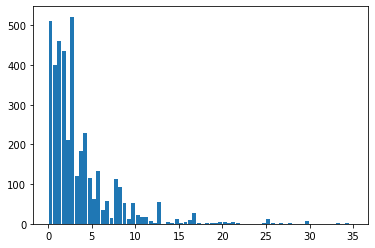

In [17]:
import matplotlib.pyplot as plt
plt.hist(item['UnitPrice'], bins=70, rwidth=0.9, range=(0, 35))[2]

1. What are the names of the top 10 items which had the most sales?

In [18]:
purchase = purchase[~purchase['InvoiceNo'].str.startswith('C')]
purchase['StockCode'] = pd.Series(purchase['StockCodeSC']).str.extract(r'(\d\d\d\d\d)')
purchase

,InvoiceNo,StockCodeSC,Quantity,StockCode
0,536365,SC85123A,6,85123
1,536365,SC71053,6,71053
2,536365,SC84406B,8,84406
3,536365,SC84029G,6,84029
4,536365,SC84029E,6,84029
...,...,...,...,...
541904,581587,SC22613,12,22613
541905,581587,SC22899,6,22899
541906,581587,SC23254,4,23254
541907,581587,SC23255,4,23255


In [19]:
item['StockCode'] = pd.Series(item['StockCode']).str.extract(r'(\d\d\d\d\d)')
item

,StockCode,Description,UnitPrice
0,85123,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029,RED WOOLLY HOTTIE WHITE HEART.,3.39
...,...,...,...
4065,85179,GREEN BITTY LIGHT CHAIN,2.46
4066,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2.91
4067,90214,"LETTER ""U"" BLING KEY RING",0.29
4068,47591,SCOTTIES CHILDRENS APRON,4.13


In [20]:
df41 = purchase.merge(item, on='StockCode')
df41.groupby(['Description'])['Quantity'].sum().nlargest(10)

Description
JUMBO BAG STRAWBERRY                  157462
WHITE HANGING HEART T-LIGHT HOLDER     83400
PAPER CRAFT , LITTLE BIRDIE            80995
JUMBO  BAG BAROQUE BLACK WHITE         78731
JUMBO BAG RED RETROSPOT                78731
MEDIUM CERAMIC TOP STORAGE JAR         78033
SMALL POPCORN HOLDER                   56921
WORLD WAR 2 GLIDERS ASSTD DESIGNS      55047
ebay                                   47706
mailout                                44954
Name: Quantity, dtype: int64

In [21]:
df41

,InvoiceNo,StockCodeSC,Quantity,StockCode,Description,UnitPrice
0,536365,SC85123A,6,85123,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,536365,SC85123A,6,85123,WHITE HANGING HEART T-LIGHT HOLDER,6.77
2,536373,SC85123A,6,85123,WHITE HANGING HEART T-LIGHT HOLDER,2.55
3,536373,SC85123A,6,85123,WHITE HANGING HEART T-LIGHT HOLDER,6.77
4,536375,SC85123A,6,85123,WHITE HANGING HEART T-LIGHT HOLDER,2.55
...,...,...,...,...,...,...
789320,581492,SC23561,1,23561,SET OF 6 RIBBONS PARTY,2.89
789321,581581,SC23561,6,23561,SET OF 6 RIBBONS PARTY,2.89
789322,579187,SC23609,1,23609,SET 10 CARDS SNOWY ROBIN 17099,2.91
789323,579512,SC23617,2,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2.91


2. What are the stock codes of the top 10 most frequently ordered items by customers in descending order?

In [22]:
df41.groupby(['StockCode'])['InvoiceNo'].count().nlargest(10)

StockCode
85049    25256
84596    17523
85099    15600
84997    13800
90214    13560
15056     6594
47566     6543
84509     5530
85123     4676
84970     4460
Name: InvoiceNo, dtype: int64

3. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by marking up the unit price by 30%.)

In [23]:
df41 = shipped_invoice.merge(purchase, on="InvoiceNo").merge(item, on="StockCode")
df41['revenue'] = 1.3 * df41['Quantity'] * df41['UnitPrice']

In [24]:
df41

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity,StockCode,Description,UnitPrice,revenue
0,536365,12/1/10 8:26,17850.0,United Kingdom,SC85123A,6,85123,WHITE HANGING HEART T-LIGHT HOLDER,2.55,19.890
1,536365,12/1/10 8:26,17850.0,United Kingdom,SC85123A,6,85123,WHITE HANGING HEART T-LIGHT HOLDER,6.77,52.806
2,536373,12/1/10 9:02,17850.0,United Kingdom,SC85123A,6,85123,WHITE HANGING HEART T-LIGHT HOLDER,2.55,19.890
3,536373,12/1/10 9:02,17850.0,United Kingdom,SC85123A,6,85123,WHITE HANGING HEART T-LIGHT HOLDER,6.77,52.806
4,536375,12/1/10 9:32,17850.0,United Kingdom,SC85123A,6,85123,WHITE HANGING HEART T-LIGHT HOLDER,2.55,19.890
...,...,...,...,...,...,...,...,...,...,...
789320,581492,12/9/11 10:03,NaN,United Kingdom,SC23561,1,23561,SET OF 6 RIBBONS PARTY,2.89,3.757
789321,581581,12/9/11 12:20,17581.0,United Kingdom,SC23561,6,23561,SET OF 6 RIBBONS PARTY,2.89,22.542
789322,579187,11/28/11 15:31,NaN,United Kingdom,SC23609,1,23609,SET 10 CARDS SNOWY ROBIN 17099,2.91,3.783
789323,579512,11/29/11 16:47,NaN,United Kingdom,SC23617,2,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2.91,7.566


In [25]:
df41.groupby(['InvoiceNo'])['revenue'].sum().nlargest(5)

InvoiceNo
578060    2.487666e+07
575328    1.866035e+07
540699    1.554736e+07
547966    1.554736e+07
574277    1.293541e+07
Name: revenue, dtype: float64

1. Discretize customers using dummy variables into five different segments (Q1,Q2,Q3,Q4,Q5) based on the 20th, 40th, 60th, 80th and 100th percentiles of the total revenue they have generated for the company.

In [26]:
ccrevenue = df41.groupby(['CustomerID','Country'])[['revenue']].sum()
bins = ccrevenue['revenue'].quantile(np.linspace(0,1,6))
bins

0.0    1.353300e+01
0.2    5.294302e+02
0.4    1.136892e+03
0.6    2.506358e+03
0.8    7.978035e+03
1.0    6.897763e+07
Name: revenue, dtype: float64

In [27]:
dummy_variable = pd.get_dummies(pd.cut(ccrevenue['revenue'],bins,labels = ['Q1','Q2','Q3','Q4','Q5']))
dummy_variable.sample(10)

,,Q1,Q2,Q3,Q4,Q5
CustomerID,Country,,,,,
13611.0,United Kingdom,0,0,1,0,0
15602.0,United Kingdom,0,0,1,0,0
17415.0,United Kingdom,0,1,0,0,0
17031.0,United Kingdom,0,1,0,0,0
13349.0,United Kingdom,0,0,0,0,1
17381.0,United Kingdom,0,0,0,0,1
17863.0,United Kingdom,0,0,0,1,0
16794.0,United Kingdom,0,0,0,0,1
14022.0,United Kingdom,0,1,0,0,0


2. How much revenue is generated in total by each segment?

In [28]:
ccrevenue['quantile'] = pd.cut(ccrevenue['revenue'], bins, labels=["Q1","Q2","Q3","Q4","Q5"])
ccrevenue = ccrevenue.reset_index()
ccrevenue

,CustomerID,Country,revenue,quantile
0,12346.0,United Kingdom,100338.6800,Q5
1,12347.0,Iceland,9753.6400,Q5
2,12348.0,Finland,142042.8867,Q5
3,12349.0,Italy,18304.2743,Q5
4,12350.0,Norway,16150.7983,Q5
...,...,...,...,...
4342,18280.0,United Kingdom,329.7580,Q1
4343,18281.0,United Kingdom,87.7240,Q1
4344,18282.0,United Kingdom,302.0810,Q1
4345,18283.0,United Kingdom,34634.1736,Q5


In [29]:
ccrevenue.groupby('quantile')[['revenue']].sum()

,revenue
quantile,
Q1,2.664046e+05
Q2,6.945977e+05
Q3,1.477750e+06
Q4,3.870394e+06
Q5,1.761172e+08


3. Using the pivot table function create a table that displays the number of customers for each country in each segment.

In [30]:
ccrevenue.groupby(['Country', 'quantile'])[['CustomerID']].count().reset_index().pivot(index='Country', columns=['quantile'], values='CustomerID')

quantile,Q1,Q2,Q3,Q4,Q5
Country,,,,,
Australia,0,3,1,3,2
Austria,0,1,0,1,9
Bahrain,1,0,1,0,0
Belgium,0,0,0,0,25
Brazil,0,0,1,0,0
Canada,2,1,0,0,1
Channel Islands,0,0,1,5,3
Cyprus,1,1,1,2,3
Czech Republic,0,0,0,0,1
